In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### 1. Типы данных дата/время

In [2]:
from datetime import datetime
now = datetime.now()
display(now)
now.year, now.month, now.day, now.hour

datetime.datetime(2020, 12, 10, 19, 39, 15, 709307)

(2020, 12, 10, 19)

In [3]:
delta = datetime(2011, 12, 7) - datetime(2008, 6, 24,22,59,59)
display(delta)
display(delta.days)
display(delta.seconds)

datetime.timedelta(days=1260, seconds=3601)

1260

3601

In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)
display(start + timedelta(12))
display(start - 2 * timedelta(12))

datetime.datetime(2011, 1, 19, 0, 0)

datetime.datetime(2010, 12, 14, 0, 0)

### 2. Конвертирование даты/времени

дата/время -> строка

In [5]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print(stamp.strftime('%d-%m-%Y day of week %w' ))

2011-01-03 00:00:00
03-01-2011 day of week 1


строка -> строкадата/время 

In [6]:
value = '2011-01-03 23:39'
datetime.strptime(value, '%Y-%m-%d %H:%M')

datetime.datetime(2011, 1, 3, 23, 39)

In [7]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

Встроенный парсер

In [8]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [9]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [10]:
# не правильный парсер для России
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [11]:
# правильный парсер для России
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

Если у нас есть правильный дата/время, то его просто загрузить в Pandas

In [12]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [13]:
idx = pd.to_datetime(datestrs + [None]) # или np.nan
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [14]:
idx[2]
pd.isna(idx)

array([False, False,  True])

### 3. Временной ряд в Pandas

In [15]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    2.318601
2011-01-05    0.474037
2011-01-07    0.571316
2011-01-08   -0.584503
2011-01-10    0.210580
2011-01-12    0.724981
dtype: float64

In [16]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [17]:
ts+ts[::2]

2011-01-02    4.637202
2011-01-05         NaN
2011-01-07    1.142632
2011-01-08         NaN
2011-01-10    0.421160
2011-01-12         NaN
dtype: float64

In [18]:
ts.index.dtype

dtype('<M8[ns]')

In [19]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [20]:
stamp = ts.index[2]
display(stamp)
ts[stamp]

Timestamp('2011-01-07 00:00:00')

0.5713159906708829

Индексы (особенности)

In [21]:
ts['1/10/2011']

0.21057979605829

In [22]:
ts['20110110']

0.21057979605829

In [23]:
ts['2011-01-10']

0.21057979605829

In [24]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
display(longer_ts.head(5))
display(longer_ts.tail(5))

2000-01-01   -1.696429
2000-01-02   -1.157643
2000-01-03   -0.569284
2000-01-04    0.083443
2000-01-05   -0.320495
Freq: D, dtype: float64

2002-09-22    0.731312
2002-09-23    0.162778
2002-09-24    1.103361
2002-09-25    0.995382
2002-09-26    0.214530
Freq: D, dtype: float64

In [25]:
longer_ts['2001'].head(5)

2001-01-01    0.232571
2001-01-02    0.605635
2001-01-03    0.054485
2001-01-04    1.918320
2001-01-05   -1.720265
Freq: D, dtype: float64

In [26]:
longer_ts['2001'].tail(5)

2001-12-27    0.963318
2001-12-28    1.991708
2001-12-29    1.736022
2001-12-30    0.434281
2001-12-31    0.273051
Freq: D, dtype: float64

In [27]:
longer_ts['2001-05']

2001-05-01   -1.154977
2001-05-02    0.757036
2001-05-03    0.287606
2001-05-04   -1.622119
2001-05-05   -0.225473
2001-05-06   -1.122102
2001-05-07   -0.185199
2001-05-08   -0.355458
2001-05-09    0.250954
2001-05-10   -0.042850
2001-05-11   -1.846566
2001-05-12   -0.367868
2001-05-13   -1.422297
2001-05-14    0.072882
2001-05-15    0.598893
2001-05-16   -0.759373
2001-05-17   -2.664188
2001-05-18    1.193241
2001-05-19    0.656782
2001-05-20    0.365920
2001-05-21   -1.577943
2001-05-22   -2.726584
2001-05-23   -0.167413
2001-05-24    2.368736
2001-05-25   -0.147296
2001-05-26   -0.047743
2001-05-27    0.381084
2001-05-28    0.161869
2001-05-29   -0.451455
2001-05-30   -1.558118
2001-05-31   -0.316285
Freq: D, dtype: float64

In [28]:
longer_ts[ datetime(2001, 1, 7):datetime(2001, 1, 12) ]

2001-01-07   -0.818704
2001-01-08    1.088682
2001-01-09   -0.126808
2001-01-10   -0.161735
2001-01-11   -0.257467
2001-01-12    0.167017
Freq: D, dtype: float64

In [29]:
longer_ts[ '2001-5':'2001-6' ]

2001-05-01   -1.154977
2001-05-02    0.757036
2001-05-03    0.287606
2001-05-04   -1.622119
2001-05-05   -0.225473
                ...   
2001-06-26   -0.305708
2001-06-27   -0.438929
2001-06-28    1.695631
2001-06-29   -1.026688
2001-06-30   -1.007267
Freq: D, Length: 61, dtype: float64

In [30]:
longer_ts.truncate(before='09/20/2002').head(5) # как вариант after (до)

2002-09-20   -1.032467
2002-09-21   -1.158777
2002-09-22    0.731312
2002-09-23    0.162778
2002-09-24    1.103361
Freq: D, dtype: float64

Поиск дубдикатов дат

In [31]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [32]:
dup_ts.index.is_unique

False

In [33]:
dup_ts['1/3/2000']  # not duplicated

4

In [34]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [35]:
grouped = dup_ts.groupby(level=0)
grouped.count().max()

3

### 4. Диапазоны дат, частотность и сдвиги

In [36]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # понедельно среда
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.209013,-0.424174,0.595480,0.193216
2001-05-09,-2.214988,0.152145,0.581362,1.467277
2001-05-16,0.809395,-1.311814,1.650535,-0.076342
2001-05-23,-1.139334,0.559288,-1.649931,1.376918
2001-05-30,-0.287780,0.840014,0.764245,-0.077516


In [37]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [38]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range(end='2012-06-01', periods=20)


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [40]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') # последний рабочий день месяца

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [41]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [43]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [44]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [45]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               '2000-01-01 15:00:00', '2000-01-01 16:30:00',
               '2000-01-01 18:00:00', '2000-01-01 19:30:00',
               '2000-01-01 21:00:00', '2000-01-01 22:30:00',
               '2000-01-02 00:00:00', '2000-01-02 01:30:00',
               '2000-01-02 03:00:00', '2000-01-02 04:30:00',
               '2000-01-02 06:00:00', '2000-01-02 07:30:00',
               '2000-01-02 09:00:00', '2000-01-02 10:30:00',
               '2000-01-02 12:00:00', '2000-01-02 13:30:00',
               '2000-01-02 15:00:00', '2000-01-02 16:30:00',
               '2000-01-02 18:00:00', '2000-01-02 19:30:00',
               '2000-01-02 21:00:00', '2000-01-02 22:30:00',
               '2000-01-

In [46]:
Hour(2) + Minute(30)

<150 * Minutes>

In [47]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [48]:
# WOM понедельно месяц
# WOM-3FRI каждая третья пятница в месяце
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') 
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [49]:
per=10
ts = pd.Series(range(per),
               index=pd.date_range('1/1/2000', periods=per, freq='W'))+1
ts

2000-01-02     1
2000-01-09     2
2000-01-16     3
2000-01-23     4
2000-01-30     5
2000-02-06     6
2000-02-13     7
2000-02-20     8
2000-02-27     9
2000-03-05    10
Freq: W-SUN, dtype: int64

In [50]:
ts.shift(2)

2000-01-02    NaN
2000-01-09    NaN
2000-01-16    1.0
2000-01-23    2.0
2000-01-30    3.0
2000-02-06    4.0
2000-02-13    5.0
2000-02-20    6.0
2000-02-27    7.0
2000-03-05    8.0
Freq: W-SUN, dtype: float64

In [51]:
ts.shift(-2)

2000-01-02     3.0
2000-01-09     4.0
2000-01-16     5.0
2000-01-23     6.0
2000-01-30     7.0
2000-02-06     8.0
2000-02-13     9.0
2000-02-20    10.0
2000-02-27     NaN
2000-03-05     NaN
Freq: W-SUN, dtype: float64

In [52]:
ts / ts.shift(1) - 1 # процентный прирост

2000-01-02         NaN
2000-01-09    1.000000
2000-01-16    0.500000
2000-01-23    0.333333
2000-01-30    0.250000
2000-02-06    0.200000
2000-02-13    0.166667
2000-02-20    0.142857
2000-02-27    0.125000
2000-03-05    0.111111
Freq: W-SUN, dtype: float64

In [53]:
ts.shift(2, freq='M')

2000-02-29     1
2000-02-29     2
2000-02-29     3
2000-02-29     4
2000-02-29     5
2000-03-31     6
2000-03-31     7
2000-03-31     8
2000-03-31     9
2000-04-30    10
dtype: int64

In [54]:
ts.shift(-1, freq='D')

2000-01-01     1
2000-01-08     2
2000-01-15     3
2000-01-22     4
2000-01-29     5
2000-02-05     6
2000-02-12     7
2000-02-19     8
2000-02-26     9
2000-03-04    10
dtype: int64

In [55]:
ts.shift(1, freq='90T')

2000-01-02 01:30:00     1
2000-01-09 01:30:00     2
2000-01-16 01:30:00     3
2000-01-23 01:30:00     4
2000-01-30 01:30:00     5
2000-02-06 01:30:00     6
2000-02-13 01:30:00     7
2000-02-20 01:30:00     8
2000-02-27 01:30:00     9
2000-03-05 01:30:00    10
dtype: int64

### 5. Периоды 

In [56]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [57]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [58]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [59]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [60]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

Периоды <--> Дата/время

In [61]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
display(rng)
ts = pd.Series(np.random.randn(3), index=rng)
ts

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

2000-01-31   -0.121487
2000-02-29    0.674500
2000-03-31    1.701000
Freq: M, dtype: float64

In [62]:
pts = ts.to_period()
pts

2000-01   -0.121487
2000-02    0.674500
2000-03    1.701000
Freq: M, dtype: float64

In [63]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.699027
2000-01-30    0.553563
2000-01-31   -0.098467
2000-02-01    0.913923
2000-02-02    0.031379
2000-02-03   -1.931963
Freq: D, dtype: float64

In [64]:
ts2.to_period('M')

2000-01   -1.699027
2000-01    0.553563
2000-01   -0.098467
2000-02    0.913923
2000-02    0.031379
2000-02   -1.931963
Freq: M, dtype: float64

In [65]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999   -0.121487
2000-02-29 23:59:59.999999999    0.674500
2000-03-31 23:59:59.999999999    1.701000
dtype: float64

Пример склеивания года и квартала

In [68]:
data = pd.read_csv('dataset/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [69]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [70]:
data.index = index
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### 6. Изменение дискретизации (смена шага)

In [71]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.059586
2000-01-02    0.076153
2000-01-03    0.086330
2000-01-04    1.256867
2000-01-05   -0.207428
                ...   
2000-04-05    0.111434
2000-04-06   -1.243620
2000-04-07   -0.189382
2000-04-08    1.357772
2000-04-09    0.040216
Freq: D, Length: 100, dtype: float64

In [72]:
# привязка к последней дате
ts.resample('M').mean()

2000-01-31   -0.073177
2000-02-29    0.295187
2000-03-31    0.034956
2000-04-30    0.140703
Freq: M, dtype: float64

In [73]:
# привязка к периоду
ts.resample('M', kind='period').mean()

2000-01   -0.073177
2000-02    0.295187
2000-03    0.034956
2000-04    0.140703
Freq: M, dtype: float64

Периоды часто нужны для корректной визуализации, что бы результат на графике отражался не на последнее число, а на кравтал.

<BarContainer object of 4 artists>

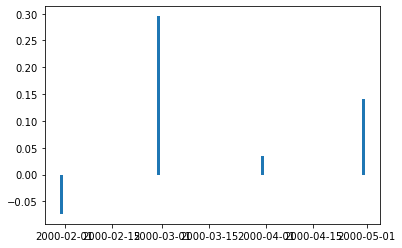

In [75]:
tss = ts.resample('M').mean()
plt.bar(   tss.index  , tss.values  )

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

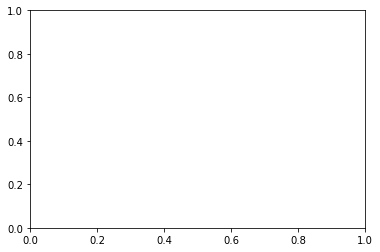

In [76]:
tss = ts.resample('M',kind='period').mean()
plt.bar(   tss.index  , tss.values  )

In [81]:
print(tss.index.shape)
print(tss.values.shape)

(4,)
(4,)


In [82]:
print(tss.index)
print(tss.values)

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04'], dtype='period[M]', freq='M')
[-0.07317677  0.29518722  0.03495622  0.14070328]


<BarContainer object of 4 artists>

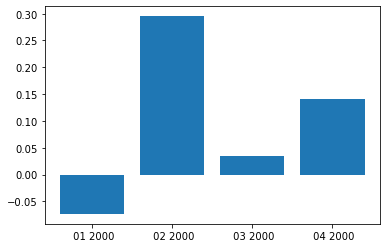

In [90]:
tss = ts.resample('M',kind='period').mean()
plt.bar(   tss.index.strftime('%m %Y')  , tss.values  ) 

,index,0
0,2000-01,-0.073177
1,2000-02,0.295187
2,2000-03,0.034956
3,2000-04,0.140703


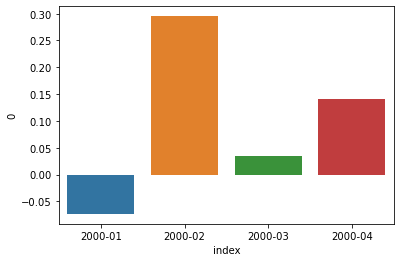

In [77]:
tss = ts.resample('M',kind='period').mean()
rs = tss.reset_index()
display(rs)
sns.barplot(x='index',  y=0 , data = rs)
plt.show()

In [91]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.174514
2000-01-02   -0.526611
2000-01-03   -0.052409
2000-01-04    0.049241
2000-01-05   -1.928227
                ...   
2000-04-05    0.134749
2000-04-06    1.153536
2000-04-07   -0.623582
2000-04-08   -2.157386
2000-04-09    0.605253
Freq: D, Length: 100, dtype: float64

In [92]:
ts.resample('M').mean()

2000-01-31   -0.047371
2000-02-29   -0.050995
2000-03-31    0.024546
2000-04-30   -0.207108
Freq: M, dtype: float64

In [93]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [94]:
ts.resample('M').mean()

2000-01-31    5.5
Freq: M, dtype: float64

In [95]:
ts.resample('M', kind='period').mean()

2000-01    5.5
Freq: M, dtype: float64

In [96]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [97]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [98]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [99]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-99-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [100]:
# как на бирже для построениея свечей
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [110]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('12/01/2020', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2020-12-02,0.735631,1.732521,-0.012002,-0.004054
2020-12-09,-0.512937,-0.205225,0.863613,-0.560227


In [111]:
# заполним пропуски
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2020-12-02,0.735631,1.732521,-0.012002,-0.004054
2020-12-03,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN
2020-12-05,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN
2020-12-09,-0.512937,-0.205225,0.863613,-0.560227


In [112]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2020-12-02,0.735631,1.732521,-0.012002,-0.004054
2020-12-03,0.735631,1.732521,-0.012002,-0.004054
2020-12-04,0.735631,1.732521,-0.012002,-0.004054
2020-12-05,0.735631,1.732521,-0.012002,-0.004054
2020-12-06,0.735631,1.732521,-0.012002,-0.004054
2020-12-07,0.735631,1.732521,-0.012002,-0.004054
2020-12-08,0.735631,1.732521,-0.012002,-0.004054
2020-12-09,-0.512937,-0.205225,0.863613,-0.560227


In [113]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2020-12-02,0.735631,1.732521,-0.012002,-0.004054
2020-12-03,0.735631,1.732521,-0.012002,-0.004054
2020-12-04,0.735631,1.732521,-0.012002,-0.004054
2020-12-05,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN
2020-12-09,-0.512937,-0.205225,0.863613,-0.560227


In [114]:
display(frame)
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2020-12-02,0.735631,1.732521,-0.012002,-0.004054
2020-12-09,-0.512937,-0.205225,0.863613,-0.560227


,Colorado,Texas,New York,Ohio
2020-12-03,0.735631,1.732521,-0.012002,-0.004054
2020-12-10,-0.512937,-0.205225,0.863613,-0.560227


,Colorado,Texas,New York,Ohio
2020-12-02,0.735631,1.732521,-0.012002,-0.004054
2020-12-03,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN
2020-12-05,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN
2020-12-09,-0.512937,-0.205225,0.863613,-0.560227


,Colorado,Texas,New York,Ohio
2020-12-02,0.735631,1.732521,-0.012002,-0.004054
2020-12-03,0.557264,1.455700,0.113086,-0.083507
2020-12-04,0.378897,1.178879,0.238174,-0.162961
2020-12-05,0.200531,0.902058,0.363262,-0.242414
2020-12-06,0.022164,0.625237,0.488349,-0.321867
2020-12-07,-0.156203,0.348417,0.613437,-0.401320
2020-12-08,-0.334570,0.071596,0.738525,-0.480773
2020-12-09,-0.512937,-0.205225,0.863613,-0.560227


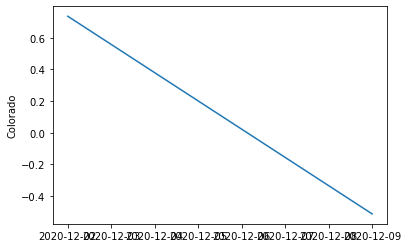

In [124]:
# настоящая интерполяция
display(df_daily)
inter = df_daily.interpolate(method='linear', axis=0)
display(inter)
sns.lineplot(data = inter.Colorado);

### 7. Скользящие окна

In [126]:
close_px_all = pd.read_csv('dataset/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [127]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


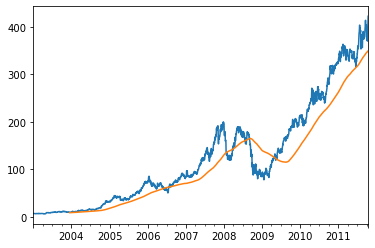

In [128]:
close_px.AAPL.plot();
close_px.AAPL.rolling(250).mean().plot();

In [129]:
close_px.AAPL.rolling(250).mean()[:10]

2003-01-02   NaN
2003-01-03   NaN
2003-01-06   NaN
2003-01-07   NaN
2003-01-08   NaN
2003-01-09   NaN
2003-01-10   NaN
2003-01-13   NaN
2003-01-14   NaN
2003-01-15   NaN
Freq: B, Name: AAPL, dtype: float64

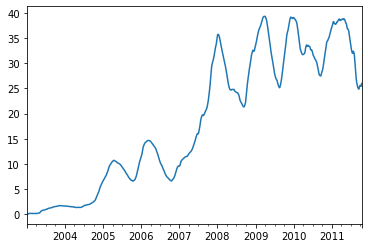

In [130]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot();

In [131]:
appl_std250[:10]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
Freq: B, Name: AAPL, dtype: float64

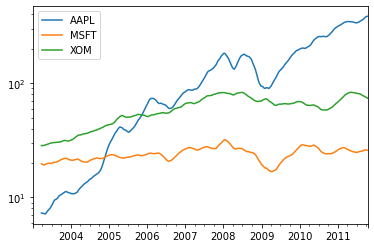

In [132]:
close_px.rolling(60).mean().plot(logy=True);

In [133]:
# 20 ДНЕВНОЕ скользящее среднее
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 8. Скользящие окна с затуханием

In [ ]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean() # придаем больший вес поздним значениям

aapl_px.plot( label='AAPL')
ma60.plot( label='Simple MA');
ewma60.plot( label='EW MA');
plt.legend();